In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
pd.set_option("display.max_columns", 100)
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("diamonds.csv")   ## Color of the diamond, with D being the best and J the worst
data.head()   ## Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
# length in mm
# width in mm

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

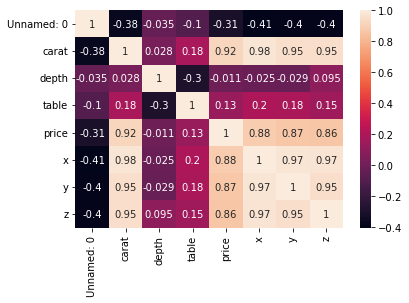

In [5]:
sbn.heatmap(data.corr(), annot = True);

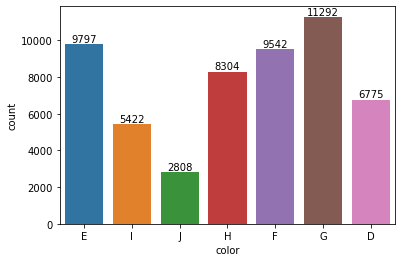

In [6]:
ax = sbn.countplot(x = data["color"])
ax.bar_label(ax.containers[0]);

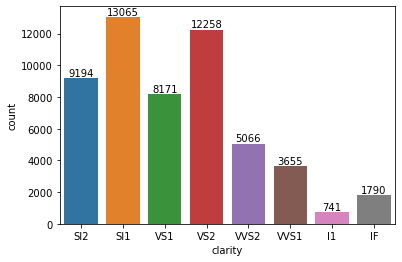

In [7]:
ax = sbn.countplot(x = data["clarity"])
ax.bar_label(ax.containers[0]);

In [8]:
data = data.drop("clarity", axis = 1)

In [9]:
d = {"D" : 7, "E" : 6, "F" : 5, "G" : 4, "H" : 3, "I" : 2, "J" : 1}

In [10]:
data["color"] = data["color"].map(d)

In [11]:
data.head()

,Unnamed: 0,carat,cut,color,depth,table,price,x,y,z
0,1,0.23,Ideal,6,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,6,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,6,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,1,63.3,58.0,335,4.34,4.35,2.75


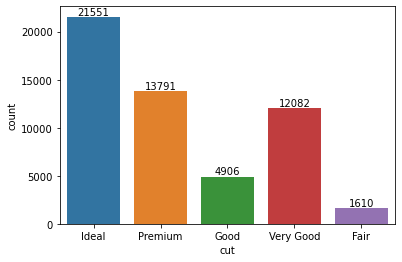

In [12]:
bx = sbn.countplot(x = data["cut"])
bx.bar_label(bx.containers[0]);

In [13]:
d1 = {"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5}
data["cut"] = data["cut"].map(d1)

In [14]:
data.head()

,Unnamed: 0,carat,cut,color,depth,table,price,x,y,z
0,1,0.23,5,6,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,6,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,63.3,58.0,335,4.34,4.35,2.75


In [15]:
data = data.drop("Unnamed: 0", axis = 1)

In [16]:
y = data["price"]
x = data.drop("price", axis = 1)

In [17]:
x

,carat,cut,color,depth,table,x,y,z
0,0.23,5,6,61.5,55.0,3.95,3.98,2.43
1,0.21,4,6,59.8,61.0,3.89,3.84,2.31
2,0.23,2,6,56.9,65.0,4.05,4.07,2.31
3,0.29,4,2,62.4,58.0,4.20,4.23,2.63
4,0.31,2,1,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,5,7,60.8,57.0,5.75,5.76,3.50
53936,0.72,2,7,63.1,55.0,5.69,5.75,3.61
53937,0.70,3,7,62.8,60.0,5.66,5.68,3.56
53938,0.86,4,3,61.0,58.0,6.15,6.12,3.74


In [18]:
def charge(x, y):
    lin = LinearRegression()
    #log = LogisticRegression()  >>> for classification
    rid = Ridge()
    las = Lasso()
    ela = ElasticNet()
    #pol = PolynomialFeatures()
    sup = SVR(kernel = "sigmoid")
    ran = RandomForestRegressor()
    dec = DecisionTreeRegressor()
    
    models = [lin, rid, las, ela, sup, ran, dec]
    model_name = ["Linear_R", "Ridge", "Lasso", "Elastic", "Support", "Random", "Decision_T"]
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 42)
    x_train = MinMaxScaler().fit_transform(x_train)
    x_test = MinMaxScaler().fit_transform(x_test)
    
    r2 = []
    mse = []
    
    result = pd.DataFrame(columns = ["r2_score", "mse"], index = model_name)
    
    for model_fit in models:
        y_pred = model_fit.fit(x_train, y_train).predict(x_test)
        r2.append(r2_score(y_true, y_pred) * 100)
        mse.append(mean_squared_error(y_true, y_pred) ** 0.5)
        
    result["r2_score"] = r2
    result["mse"] = mse
        
    return result.sort_values("r2_score", ascending = False) 

In [19]:
data.corr()

,carat,cut,color,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
depth,0.028224,-0.218055,-0.047279,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
charge(x, y)  ### bilgisayarda çalışmadı bu satır